In [102]:
import pandas as pd
from matplotlib.pylab import plt
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [103]:
print("Lets look at the hourly ridership trends in Jersey City, especifically rush hour timeframes") 

Lets look at the hourly ridership trends in Jersey City, especifically rush hour timeframes


In [104]:
# We only have data for these years
years = [2017, 2018, 2019] 
# Only these stations are in Jersey City
stations = ['Journal Square', 'Grove Street', 'Exchange Place', 'Newport']
# We will only use the following columns: 
cols = ['station', 'year','month', 'Hour', 'Avg Weekday Entry', 'Avg Weekday Exit']

# We are defining our rush-hour timeframes as the following hours:
morning_rush_hours = ['06:00:00', '07:00:00', '08:00:00', '09:00:00']   # Morning Rush Hour from 6:00 AM to 10:59 AM
evening_rush_hours = ['16:00:00', '17:00:00', '18:00:00', '19:00:00']   # Evening Rush Hour from 4:00 PM to 07:59 PM

print("Only these stations are actually in Jersey City: {}".format(stations))

Only these stations are actually in Jersey City: ['Journal Square', 'Grove Street', 'Exchange Place', 'Newport']


In [105]:
path_hourly_ridership = pd.DataFrame()
for year in years: 
    temp = pd.read_csv("../data/path_ridership_data/{}-PATH-hourly-Ridership-Report.csv".format(year), thousands=',')
    temp['year'] = year # ridership data doesn't have the year, add it
    path_hourly_ridership = path_hourly_ridership.append(temp)

## filter for stations we're interested in 
path_hourly_ridership = path_hourly_ridership[path_hourly_ridership['station'].isin(stations)]
path_hourly_ridership.reset_index(inplace=True)

## format time column
path_hourly_ridership['Hour'] = pd.to_datetime(path_hourly_ridership['Hour']).dt.strftime('%H:%M:%S')
path_hourly_ridership = path_hourly_ridership[cols]

months = path_hourly_ridership.month.unique()
months.sort()

path_hourly_ridership.head(7)

,station,year,month,Hour,Avg Weekday Entry,Avg Weekday Exit
0,Journal Square,2017,1,00:00:00,39,351
1,Journal Square,2017,1,01:00:00,23,234
2,Journal Square,2017,1,02:00:00,30,118
3,Journal Square,2017,1,03:00:00,55,90
4,Journal Square,2017,1,04:00:00,193,119
5,Journal Square,2017,1,05:00:00,718,183
6,Journal Square,2017,1,06:00:00,1685,335


In [114]:
# We want to aggregate ridership number by rush_hour timeframes to get an idea of how many people use the stations for work

print("Morning Rush: {}".format(morning_rush_hours))
print("Evening Rush: {}".format(evening_rush_hours))

avg_morning_rush = path_hourly_ridership[path_hourly_ridership['Hour'].isin(morning_rush_hours)]
avg_evening_rush = path_hourly_ridership[path_hourly_ridership['Hour'].isin(evening_rush_hours)]

print()
print('Morning Rush Hour Numbers', avg_morning_rush.head(), '\n')
print('Evening Rush Hour Numbers', avg_evening_rush.head(), '\n')

avg_morning_rush = avg_morning_rush.groupby(['station','year','month'], as_index=False).sum()
avg_evening_rush = avg_evening_rush.groupby(['station','year','month'], as_index=False).sum()

print()
print('Morning Rush Hour Numbers', avg_morning_rush.head(), '\n')
print('Evening Rush Hour Numbers', avg_evening_rush.head(), '\n')

Morning Rush: ['06:00:00', '07:00:00', '08:00:00', '09:00:00']
Evening Rush: ['16:00:00', '17:00:00', '18:00:00', '19:00:00']

Morning Rush Hour Numbers            station  year  month      Hour  Avg Weekday Entry  Avg Weekday Exit
6   Journal Square  2017      1  06:00:00               1685               335
7   Journal Square  2017      1  07:00:00               3258               636
8   Journal Square  2017      1  08:00:00               5745               899
9   Journal Square  2017      1  09:00:00               3402               624
30  Journal Square  2017      2  06:00:00               1704               330 

Evening Rush Hour Numbers            station  year  month      Hour  Avg Weekday Entry  Avg Weekday Exit
16  Journal Square  2017      1  16:00:00               1055              1773
17  Journal Square  2017      1  17:00:00               1070              3906
18  Journal Square  2017      1  18:00:00                764              4350
19  Journal Square  2017     

In [107]:
dates = []
for year in years:
    for month in months:
        dates.append("{}/{}".format(month,str(year)[2:]))
daterange = dates[:-4] # TODO: at time of analysis we only had data up until AUGUST 2019

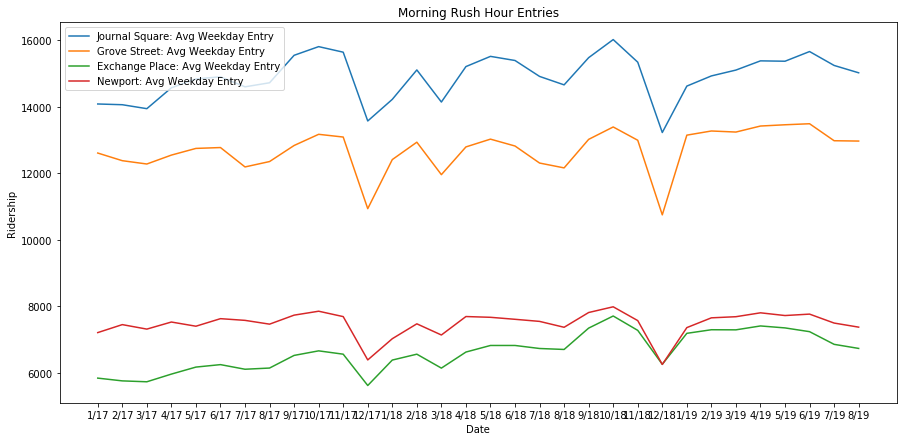

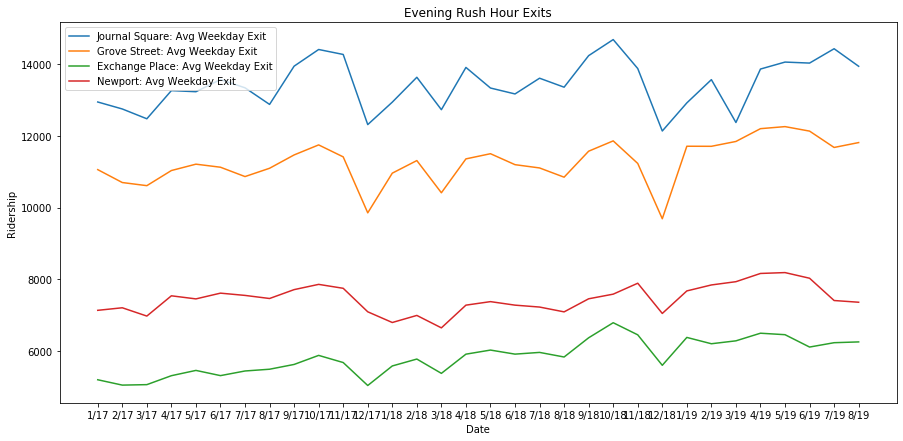

In [113]:
def plot_ridership(x_axis, ridership_data, title, fields, stations):
    
    plt.figure(figsize=(15,7))
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel("Ridership")  
    for station in stations:
        for field in fields: 
            temp = ridership_data[ridership_data['station'] == station][field]
            plt.plot(x_axis, temp, label='{}'.format(station + ': ' + field))
    plt.legend(loc='upper left')
    plt.show()
    
plot_ridership(daterange, avg_morning_rush, "Morning Rush Hour Entries", 
               ['Avg Weekday Entry'], stations)
plot_ridership(daterange, avg_evening_rush, "Evening Rush Hour Exits", 
               ['Avg Weekday Exit'], stations)

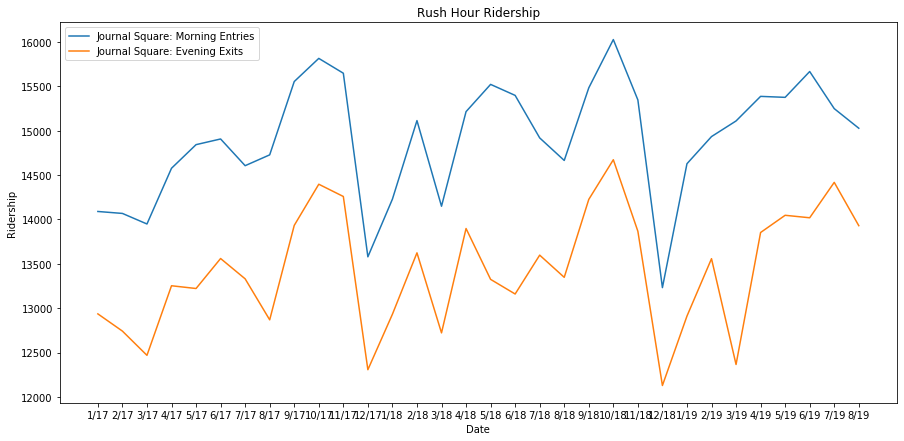

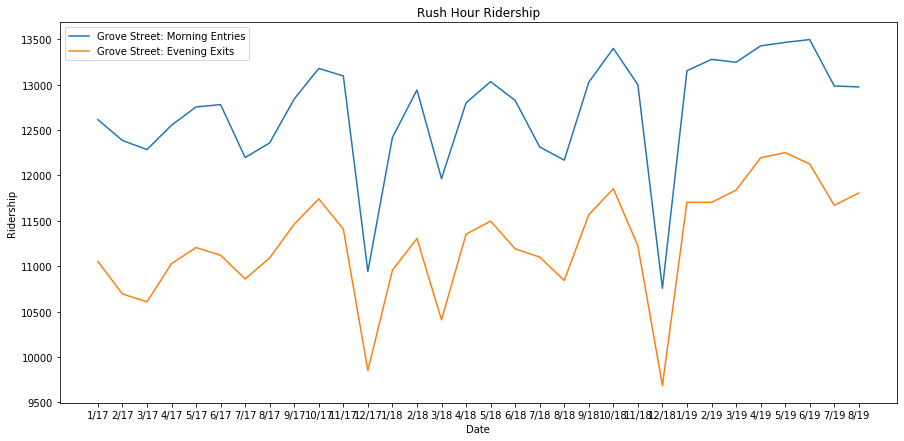

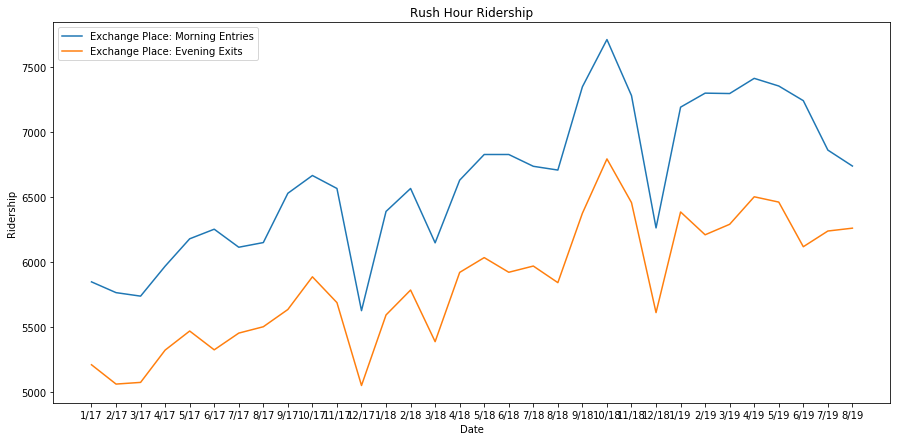

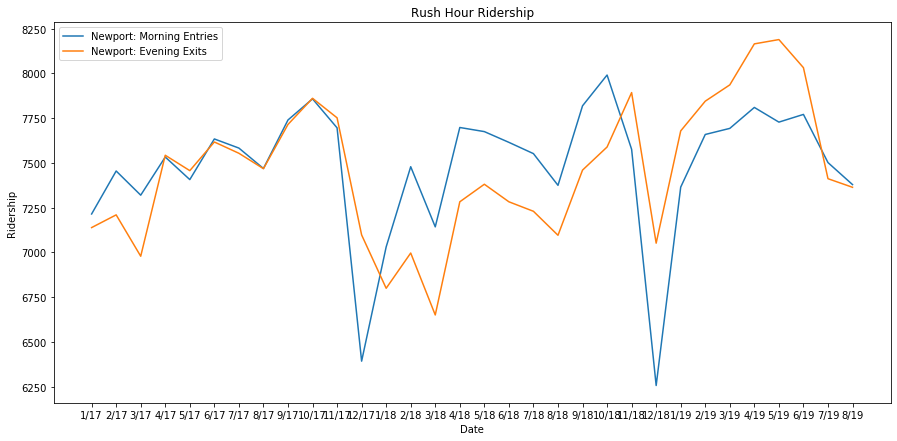

In [115]:
def plot_station_ridership(x_axis, morning_data, evening_data, title, stations):
    for station in stations:
        plt.figure(figsize=(15,7))
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel("Ridership")  
        
        temp = morning_data[morning_data['station'] == station]['Avg Weekday Entry']
        plt.plot(x_axis, temp, label='{}'.format(station + ': Morning Entries'))
        
        temp = evening_data[evening_data['station'] == station]['Avg Weekday Exit']
        plt.plot(x_axis, temp, label='{}'.format(station + ': Evening Exits'))
    
        plt.legend(loc='upper left')
        plt.show()

plot_station_ridership(daterange, avg_morning_rush, avg_evening_rush,'Rush Hour Ridership', 
                       stations)

In [123]:
decompositions = []
for station in stations: 
    morning_decomposed  = sm.tsa.seasonal_decompose(
        avg_morning_rush[(avg_morning_rush['station'] == station)]['Avg Weekday Entry'], model='additive', freq=12)
    evening_decomposed = sm.tsa.seasonal_decompose(
        avg_evening_rush[(avg_evening_rush['station'] == station)]['Avg Weekday Exit'],model='additive', freq=12)
    decompositions.append({
        'station': station, 
        'morning': morning_decomposed, 
        'evening': evening_decomposed
    })

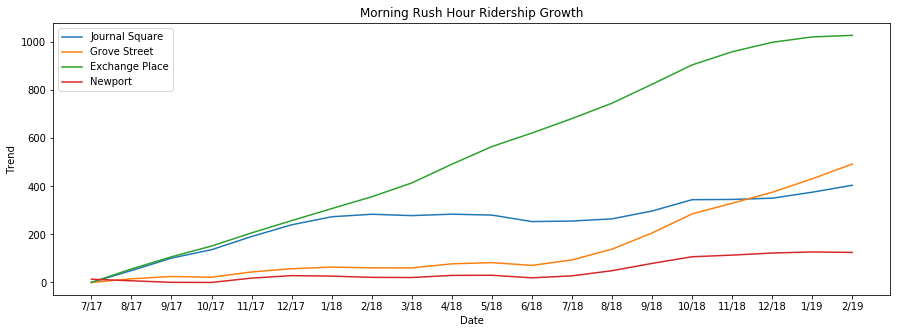

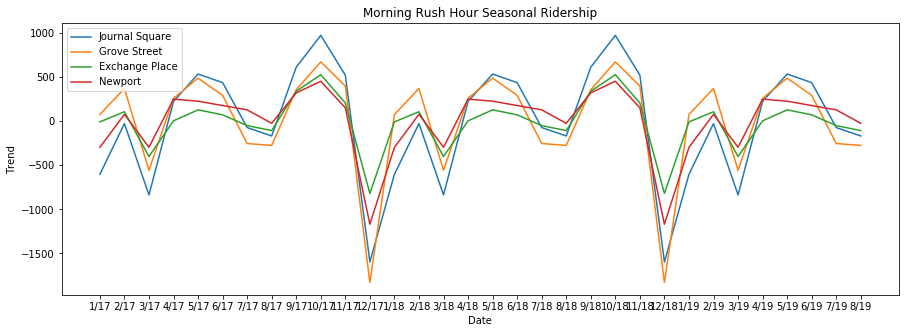

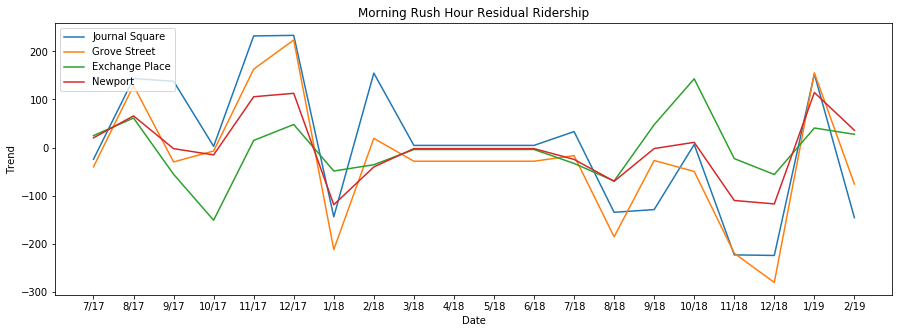

In [143]:
def plot_decompositions(title, decompositions, component, timeframe, daterange  ): 
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel("Trend")  
    for decomp in decompositions:
        station = decomp['station']
        decomp_info = decomp[timeframe]
        if component == 'trend':
            decomp_info_rebased = decomp_info.trend - decomp_info.trend.min()
        elif component == 'seasonal':
            decomp_info_rebased = decomp_info.seasonal 
        elif component == 'resid':
            decomp_info_rebased = decomp_info.resid 
        else: 
            decomp_info_rebased = decomp_info.observed

        plt.plot(daterange, decomp_info_rebased, label='{}'.format(station))
    plt.legend(loc='upper left')
    plt.show()

plot_decompositions('Morning Rush Hour Ridership Growth', decompositions, 'trend', 'morning', daterange)
plot_decompositions('Morning Rush Hour Seasonal Ridership', decompositions, 'seasonal', 'morning', daterange)
plot_decompositions('Morning Rush Hour Residual Ridership', decompositions, 'resid', 'morning', daterange)